### Computational Guided Inquiry for PChem (Neshyba, 2023)

# Moments of the Maxwell Probability Density (needs work)

## Introduction

An important quantitative use of probability densities is to calculate averages -- like a molecule's average speed, for example, or its average kinetic energy. Here we'll go about that in two steps: first we'll find what are called *moments*, then we'll convert those to *speed averages*.

Another goal of this exercise is to have you familiarize yourself with the shape of distribution functions, especially as the temperature changes. Along the way, you'll get accustomed to the idea of *normalization*.

## The idea of normalization
Probability densities are supposed to have the property of being *normalized*. That means the area under a probability density curve -- for any given temperature -- equals one. For the Boltzmann probability density we'd express this as property as

$$ 
\int\limits_{-\infty}^{\infty} f_B(T,v_x) \ dv_x = 1 \ \ \ \ (1) 
$$

while for the Maxwell probability density we'd write

$$ 
\int\limits_0^{\infty} f_M(T,v) \ dv = 1 \ \ \ \ (2) 
$$

## Getting moments from probability densities
*Moments* in thermodynamics are denoted using the notation $\langle ...\rangle$. For example, the first moment of the speed is given by

$$ 
\langle v \rangle = \int\limits_0^{\infty} f_M(T,v) \ v \ dv  \ \ \ \ (3) 
$$

Generalizing this idea, we could write

$$ 
\langle v^n \rangle = \int\limits_0^{\infty} f_M(T,v) \ v^n \ dv \ \ \ \ (4) 
$$

where obviously $n=1$ gives the first moment of the speed.

These moments can be evaluated analytically, which means a closed-form expression is available. There are integral tables for that. But you can also evaluate them numerically -- which is nice because doing so can provide a check on your skill at using an integral table. The trapezoidal rule works very nicely for this purpose too (see, e.g., https://en.wikipedia.org/wiki/Trapezoidal_rule). In this CGI, we're going to focus on numerical integration; we'll take an analytical approach later.

## Getting averages from moments
These moments have different dimensions, and therefore different units: the units of $\langle v \rangle$ in SI would be $m/s$, whereas $\langle v^2 \rangle$ would be $m^2/s^2$. That makes it difficult to compare them to one another. To get around that, we can raise the moments to  appropriate exponents (like 1, 1/2, 1/3, etc.). When we do that, we also assign special names to the results:

- The first moment of the speed raised to the power "1" is just the *average speed*. We symbolize it as $\bar c$,

$$
\bar c = \langle v \rangle \ \ \ \ (5)
$$ 

- The second moment of the speed raised to the power "1/2" is the *root mean square* speed. We symbolize it as $c$,

$$
c = \langle v^2 \rangle ^\frac{1}{2} \ \ \ \ (6)
$$ 

- The third moment of the speed raised to the power "1/3" is the *cubed-root-mean-cubed speed*. We symbolize it as $\tilde c$,

$$
\tilde c = \langle v^3 \rangle ^\frac{1}{3} \ \ \ \ (7)
$$

## Analytical expressions for moments of the Maxwell density
It's possible to derive *analytical* expressions for the preceding moments. For example,

$$
\bar c = \bigl( \frac{8RT}{\pi M} \bigr)^{1/2}
$$ 

and

$$ 
c = \bigl( \frac{3RT}{M} \bigr)^{1/2}
$$

You'll use these expressions in the last part of this exercise to compare to your numerical results.

## The idea of metadata
The idea behind *Metadata* is data often needs a little explanation. For example, you might be supplied with a grid of speeds, but in what units? The datasets we generated in a previous CGI (fB.txt, fM.txt, etc.) have simple metadata attached. Here, we extract that metadata from those files by means of some Linux (operating system) commands. 

## Learning Goals
1. I can explain the idea behind *metadata*.
1. I can explain what it means to say that a probability density should be *normalized*, and how to test whether a given function really is normalized.
1. I can write integral formulas for moments of the speed (and velocity components).
1. I can describe how the trapezoidal rule works.
1. I can numerically evaluate integrals describing moments (using np.trapz), and can describe what it means to verify whether such integrations are converged.
1. I can use the label/legend method for annotating multiple graphs in a single plot.
1. I am familiar with evaluating analytical expressions for $\bar c$, $c$, and $\tilde c$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import sys; sys.path.append('/home'); import PchemLibrary as PL

In [2]:
%matplotlib notebook

### Checking out the metadata
The code below executes a Linux command -- i.e., an operating system command -- that reads metadata from two of the files we created in a previous exercise. You're prompted to duplicate it for other gridded variables from that exercise.

In [3]:
# Extract metadata for the velocity component
%cat 'vx.txt' | grep "#"

# Do the same for TB and fB
### BEGIN SOLUTION
%cat 'TB.txt' | grep "#"
%cat 'fB.txt' | grep "#"
### END SOLUTION

# Extract metadata for the speed
%cat 'v.txt' | grep "#"

# Do the same for TM and fM
### BEGIN SOLUTION
%cat 'TM.txt' | grep "#"
%cat 'fM.txt' | grep "#"
### END SOLUTION

# vx for fB, units meter / second
# Tgrid for fB, units kelvin
# fB, units second / meter
# v for fM, units meter / second
# Tgrid for fM, units kelvin
# fM, units second / meter


### Loading the state space and probability density
Now that we know what the units are, we'll load all six the data files, and attach units using AssignQuantity. It'll smooth things along if you name these variables "TB", "fB", "TM", and "fM".

In [4]:
# Load the velocity component file and attach units
vx = np.loadtxt('vx.txt'); vx = AssignQuantity(vx,'m/s'); print(np.shape(vx))

# Do the same for TB and fB
### BEGIN SOLUTION
TB = np.loadtxt('TB.txt'); TB = AssignQuantity(TB,'K'); print(np.shape(TB))
fB = np.loadtxt('fB.txt'); fB = AssignQuantity(fB,'s/m'); print(np.shape(fB))
### END SOLUTION


# Load the speed file & attach units
v = np.loadtxt('v.txt'); v = AssignQuantity(v,'m/s'); print(np.shape(v))

# Do the same for TM and fM
### BEGIN SOLUTION
TM = np.loadtxt('TM.txt'); TM = AssignQuantity(TM,'K'); print(np.shape(TM))
fM = np.loadtxt('fM.txt'); fM = AssignQuantity(fM,'s/m'); print(np.shape(fM))
### END SOLUTION

(40, 60)
(40, 60)
(40, 60)
(40, 70)
(40, 70)
(40, 70)


### Graphing
In the cell below, we make a surface plot (using PL.plot_surface) of $f_B(T_B,v_x)$. This is mainly to make sure that what we thought we loaded, really is that.

<IPython.core.display.Javascript object>


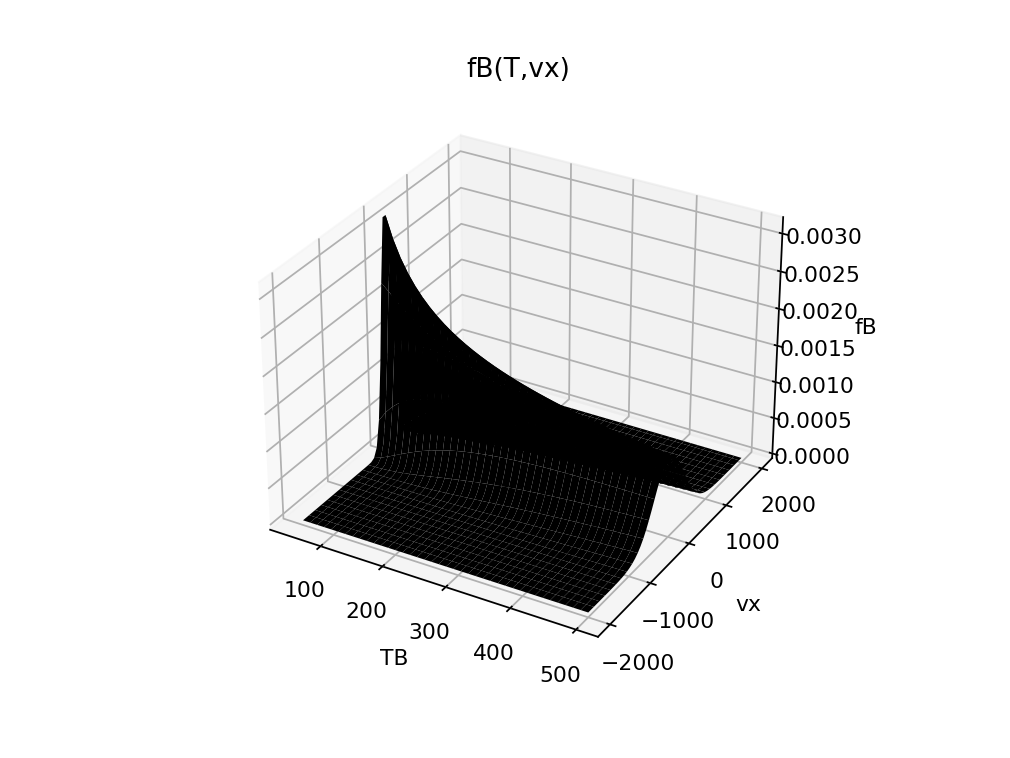

<Axes3DSubplot:title={'center':'fB(T,vx)'}, xlabel='TB', ylabel='vx'>

In [5]:
# Graphing fB(T,vx)
llist = ["TB","vx","fB"]
PL.plot_surface1(TB, vx, fB, color='black',title='fB(T,vx)',labellist=llist)

### Your turn
Do something similar, but this time a surface plot of $f_M(T_M,v)$

<IPython.core.display.Javascript object>


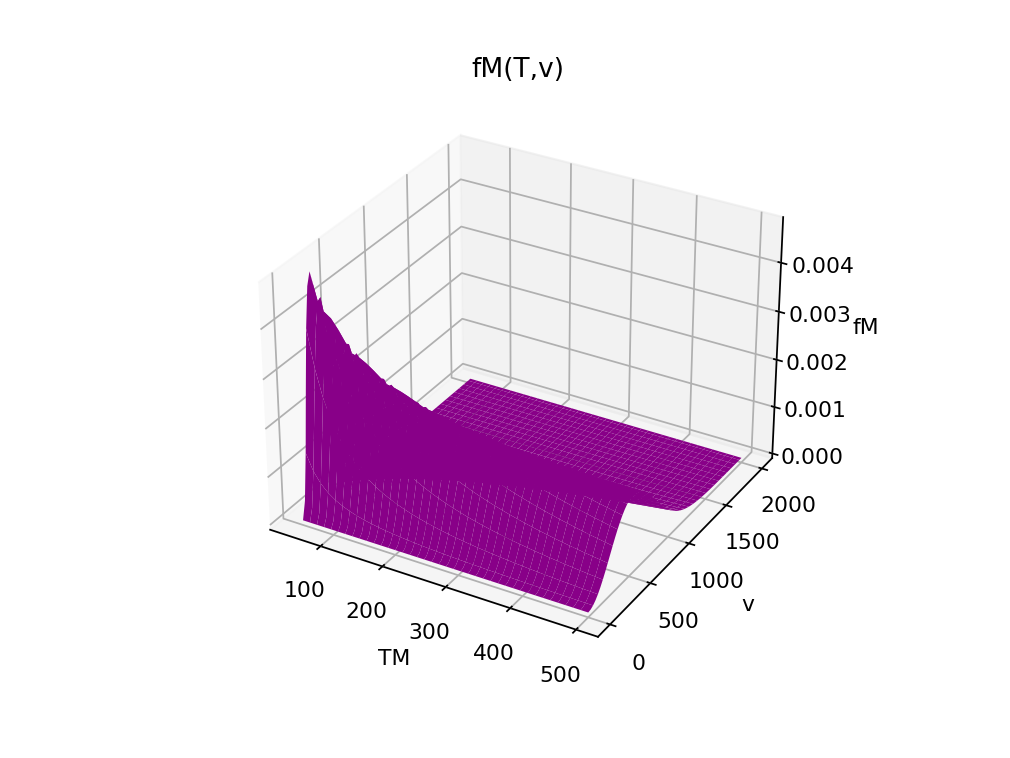

In [6]:
# Graphing fM(T,v)
### BEGIN SOLUTION
xlabel = "TM"
ylabel = "v"
zlabel = "fM"
llist=[xlabel,ylabel,zlabel]
ax = PL.plot_surface1(TM, v, fM, color='magenta',title='fM(T,v)',labellist=llist) 
### END SOLUTION

### Slicing, the label/legend method, and normalization
The cell below takes slices of the first and last temperatures of $f_B(T_B,v_x)$ and graphs them on the same plot. The first slice is at a lower temperature, so it's colored blue; the last is colored red because it's hot.

We're also using a way of identifying multiple graphs on a plot, called the *label/legend* method, which we introduced a in the *Arrays* CGI.

<IPython.core.display.Javascript object>


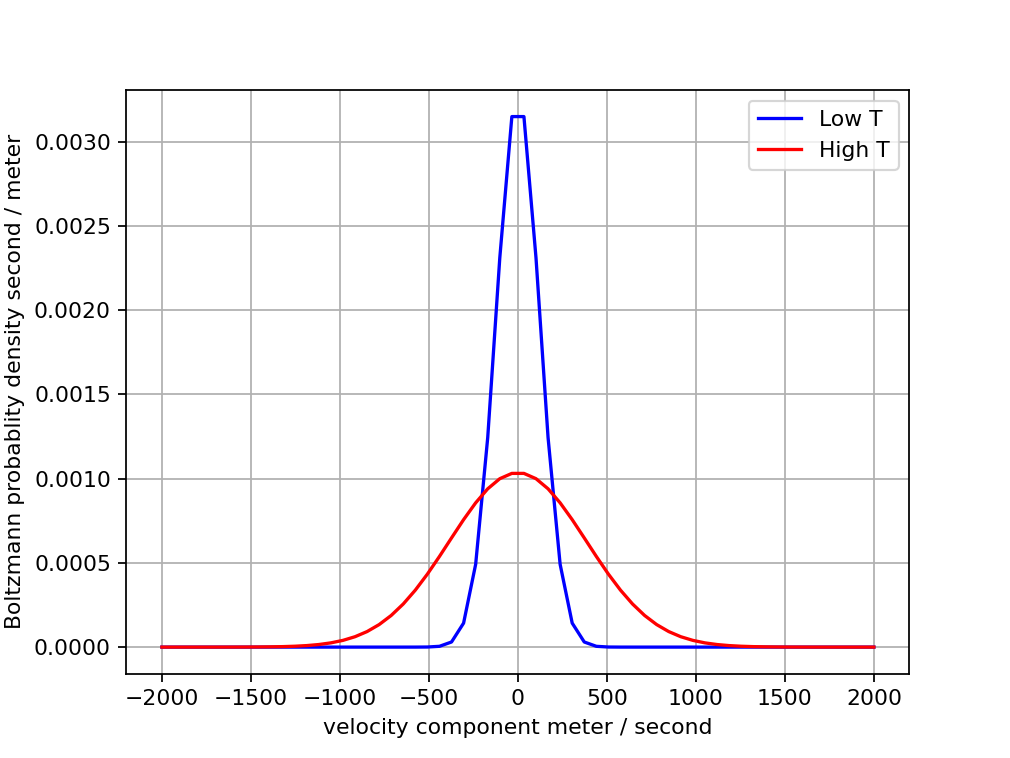

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, 'Boltzmann probablity density second / meter')

In [7]:
# Slicing
vxfirst = vx[0,:]
fBfirst = fB[0,:]
vxlast = vx[-1,:]
fBlast = fB[-1,:]

# Specifying labels 
xlabel = 'velocity component ' + str(vxfirst.units)
ylabel = 'Boltzmann probablity density ' + str(fBfirst.units)

# Plot first and last using the label/legend method
plt.figure()
plt.plot(vxfirst,fBfirst,'blue',label='Low T')
plt.plot(vxlast,fBlast,'red',label='High T')
plt.legend()
plt.grid(True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

### Your turn
Now slice and plot $f_M(v)$ at the first and last temperatures. Use the "label/legend" method to annotate!

<IPython.core.display.Javascript object>


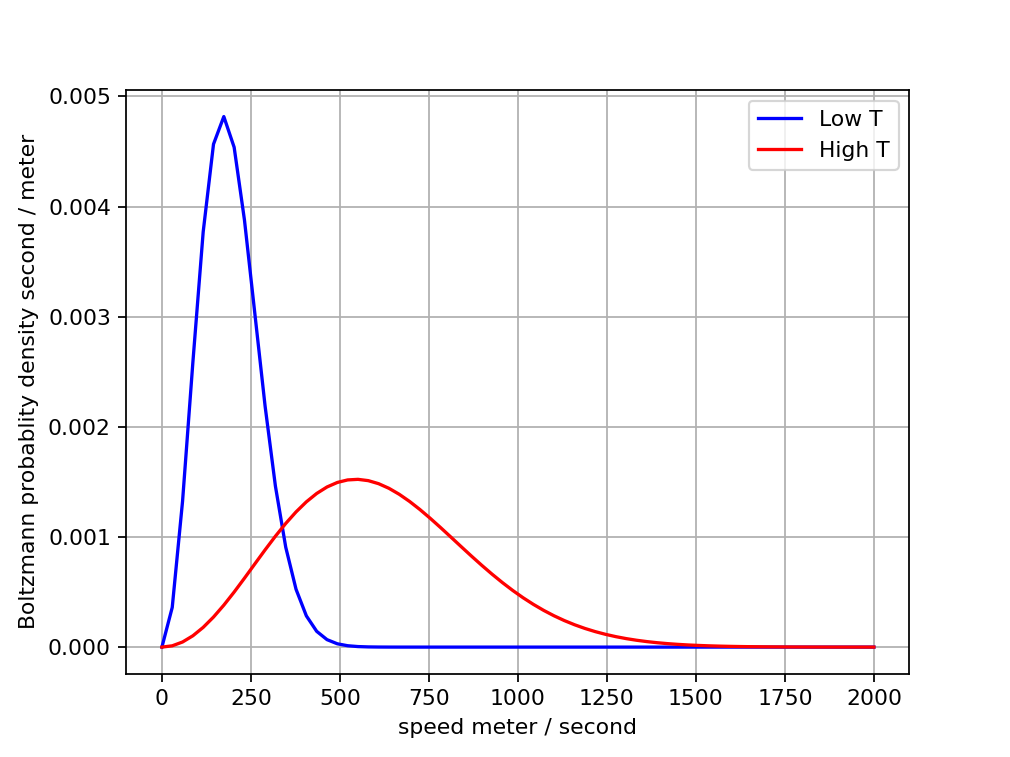

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [8]:
# Slice out the first and last temperatures of the Maxwell function
### BEGIN SOLUTION
vfirst = v[0,:]
fMfirst = fM[0,:]
vlast = v[-1,:]
fMlast = fM[-1,:]
### END SOLUTION

# Graph them together (using the label/legend method)
### BEGIN SOLUTION
xlabel = 'speed ' + str(vfirst.units)
ylabel = 'Boltzmann probablity density ' + str(fMfirst.units)

plt.figure()
plt.plot(vfirst,fMfirst,'blue',label='Low T')
plt.plot(vlast,fMlast,'red',label='High T')
plt.grid(True)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
### END SOLUTION

### Numerical integration
Before we look at the moments of the velocity components, let's have a look at whether our Boltzmann functions are actually *normalized*. For this purpose, we'll use numpy's *trapz* function, which implements the trapezoidal rule for integration. Because this is a numerical method, we don't expect the area to be exactly one -- but we'll be happy if it's pretty close.

In [9]:
# Testing for normalization of fB, low-temperature
integrand = fBfirst
Area_under_fBfirst = np.trapz(integrand,vxfirst)
print(Area_under_fBfirst)

# Testing for normalization of fB, high-temperature
integrand = fBlast
Area_under_fBlast = np.trapz(integrand,vxlast)
print(Area_under_fBlast)

0.9999999999999999 dimensionless
0.9999997755095859 dimensionless


### Your turn
Below, test for normalization of our two Maxwell curves (low-temperature and high-temperature).

In [10]:
# Test for normalization of fM, low-temperature
### BEGIN SOLUTION
Area_under_fMfirst = np.trapz(fMfirst,vfirst)
print(Area_under_fMfirst)
### END SOLUTION

# Test for normalization of fM, high-temperature
### BEGIN SOLUTION
Area_under_fMlast = np.trapz(fMlast,vlast)
print(Area_under_fMlast)
### END SOLUTION

0.9999999999999998 dimensionless
0.99999387836388 dimensionless


### Moments 
Now we'll take a look at the *first moment* of the Maxwell density function. As you'll be able to see from the cell below, we can do this numerically using the same trapezoidal rule that we used to test for normalization of $f_M$: if you compare Eqs. (2) and (3), you'll see that the only difference is that the integrand is $f_M \times v$ (rather than $f_M$).

You'll also see in the cell below that we're graphing this integrand ($f_M \times v$) as a function of $v$. The purpose of graphing the integrand in this way is to examine whether the integration is converged -- so that we know we're not missing anything.

c-bar low T  194.44058898724535 meter / second
c-bar high T  614.8542101340902 meter / second


<IPython.core.display.Javascript object>


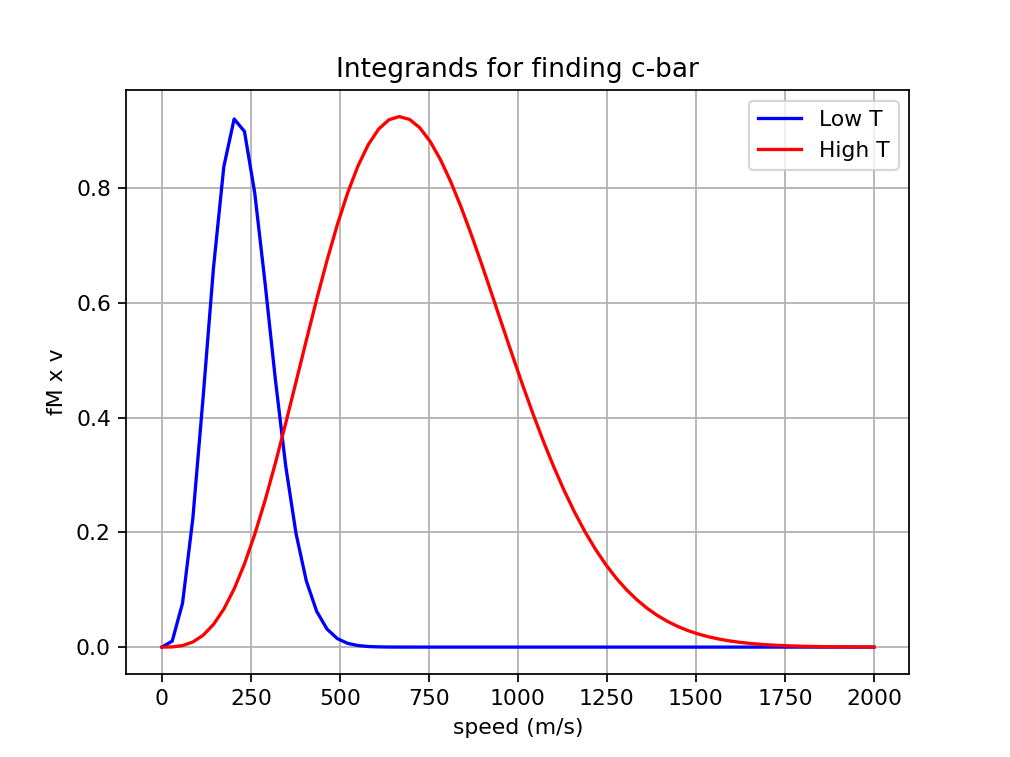

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [11]:
# Labels and a title
xlabel = 'speed (m/s)'
ylabel = 'fM x v'
title = 'Integrands for calculating the first moment of speed'

# Computing the integrand of the low-temperature speed moment, and integrating
integrandfirst = fMfirst*vfirst
moment1 = np.trapz(integrandfirst,vfirst)
cbar = moment1
print('c-bar low T ', cbar)

# Same in the high-temperature limit
integrandlast = vlast*fMlast
moment1 = np.trapz(integrandlast,vlast)
cbar = moment1
print('c-bar high T ', cbar)

# Graphing
plt.figure()
plt.plot(vfirst,integrandfirst,'blue',label='Low T')
plt.plot(vlast,integrandlast,'red',label='High T')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Integrands for finding c-bar')
plt.grid(True)
plt.legend()

### Your turn: the second moment of the speed, and the rms speed ($c$)
Now do something analogous for the *second* moment of the speed, at the first and last temperatures. Start with computing and plotting the relevant integrand. You should also print $c$, i.e., the *square root* of $<v^2>$, for each temperature (see Eq. 6). 

c at low T  211.04332662817296 meter / second
c at high T  667.3578762016642 meter / second


<IPython.core.display.Javascript object>


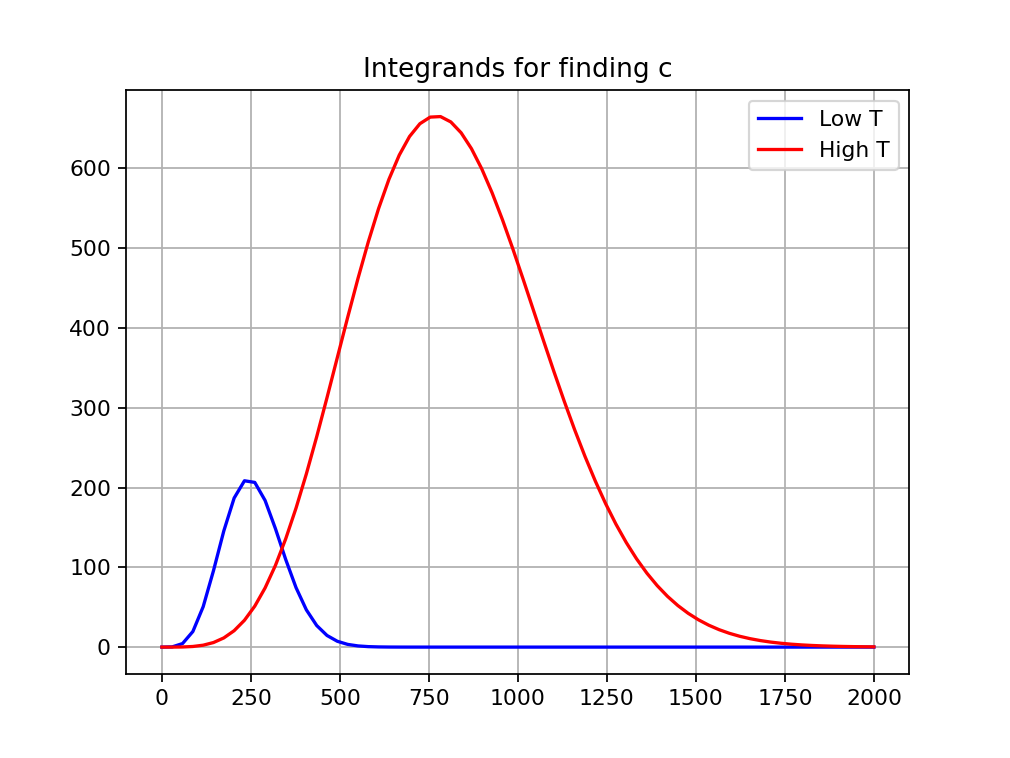

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [12]:
# Labels and a title
xlabel = 'speed (m/s)'
ylabel = 'fM x v^2'
title = 'Integrands for calculating the second moment of speed'

# Compute the second moment of the speed, and the square root of it, at low temperature
### BEGIN SOLUTION
integrandfirst = vfirst**2*fMfirst
moment2 = np.trapz(integrandfirst,vfirst)
c = moment2**.5
print('c at low T ', c)
### END SOLUTION

# Same but at high temperature
### BEGIN SOLUTION
integrandlast = vlast**2*fMlast
moment2 = np.trapz(integrandlast,vlast)
c = moment2**.5
print('c at high T ', c)
### END SOLUTION

# Graphing
### BEGIN SOLUTION
plt.figure()
plt.plot(vfirst,integrandfirst,'blue',label='Low T')
plt.plot(vlast,integrandlast,'red',label='High T')
plt.grid(True)
plt.title('Integrands for finding c')
plt.legend()
### END SOLUTION

### Your turn (again)
Now find values of the *third* moment, for the first and last temperatures. Also, print $\tilde c$, i.e., the corresponding *cubed root* of $<v^3>$ (see Eq. 7), at both temperatures.

c-tilde at low T  226.0238835242577 meter / second
c-tilde at high T  714.714616000441 meter / second


<IPython.core.display.Javascript object>


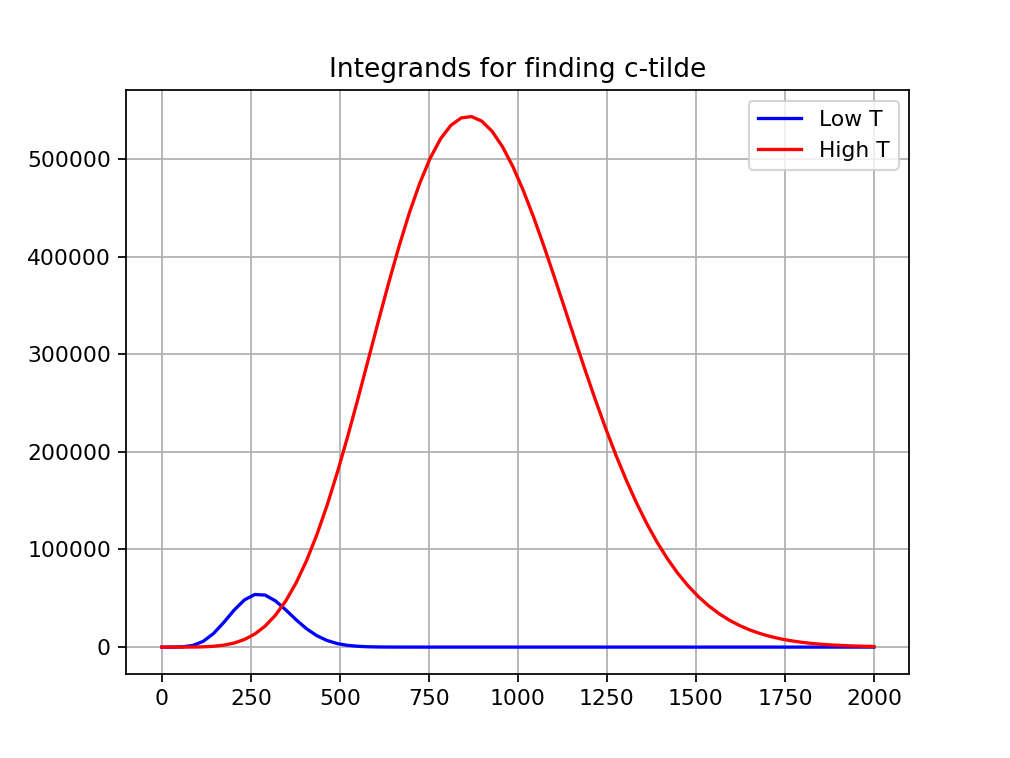

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [13]:
# Labels and a title
xlabel = 'speed (m/s)'
ylabel = 'v^3 x fM'
title = 'Integrands for calculating the third moment of speed'

# Compute the third moment of the speed, and the cubed root of it, at low temperature
### BEGIN SOLUTION
integrandfirst = vfirst**3*fMfirst
moment3 = np.trapz(integrandfirst,vfirst)
ctilde = moment3**(1/3)
print('c-tilde at low T ', ctilde)
### END SOLUTION

# Same but at high temperature
### BEGIN SOLUTION
integrandlast = vlast**3*fMlast
moment3 = np.trapz(integrandlast,vlast)
ctilde = moment3**(1/3)
print('c-tilde at high T ', ctilde)
### END SOLUTION

# Graphing
### BEGIN SOLUTION
plt.figure()
plt.plot(vfirst,integrandfirst,'blue',label='Low T')
plt.plot(vlast,integrandlast,'red',label='High T')
plt.grid(True)
plt.title('Integrands for finding c-tilde')
plt.legend()
### END SOLUTION

### Comparison to analytical results
In the cell below, calculate values of $\bar c$, $c$, and $\tilde c$ from analytical expressions (with a minimum of parentheses), and print the results. For the first two of these, see the introduction. For $\tilde c =$, use your own analytical result.

In [14]:
# Constants for T=500 K, M=28 g/mol
T = AssignQuantity(500,'K')          # Assuming the high-temperature results
M = AssignQuantity(0.028,'kg/mol')   # Assuming N2 gas
R = AssignQuantity(8.314,'J/mol/K')  # SI gas constant

# cbar
### BEGIN SOLUTION
cbar = (8*R*T/(np.pi*M))**(1/2)
cbar.ito('m/s')
print('cbar: ', cbar)
### END SOLUTION

# c
### BEGIN SOLUTION
c = (3*R*T/M)**(1/2)
c.ito('m/s')
print('c: ', c)
### END SOLUTION

# ctilde
### BEGIN SOLUTION
ctilde = 1.855*(R*T/M)**(1/2)
ctilde.ito('m/s')
print('ctilde: ',ctilde)
### END SOLUTION

cbar:  614.8668141187784 meter / second
c:  667.3775971238898 meter / second
ctilde:  714.7512285753693 meter / second


### Pause for analysis
One check on your code and theory here is whether you got values close to your numerical results. Another check is to verify that $\bar c < c < \tilde c$. If you find any big discrepancies along these lines, you might want to go back and see what might have gone wrong.

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page